# Importar Bibliotecas Necesarias
Primero importamos las bibliotecas necesarias para trabajar con los datos, hacer solicitudes HTTP, manipular los datos con pandas, y trabajar con JSON, SQLite, y otros recursos.



In [1]:
import json  # Trabajar con archivos JSON
import pandas as pd  # Manipulación de datos
import requests  # Realizar solicitudes HTTP
import os  # Trabajar con el sistema de archivos
import sqlite3  # Conectar y manipular bases de datos SQLite
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

local_file = os.getcwd()
Token_= ""

# Ruta del archivo JSON con los IDs de las ciudades,  contiene información sobre diversas ciudades con sus respectivos IDs
ruta_archivo = local_file + r"\city.list.json"

# Ruta del archivo para guardar la respuesta de la API
save_path = local_file + r"\OpenWeatherMap.json"

db_path = local_file + r"\OpenWeatherMap.db"
images_path = local_file + r"\images"


# Extracción de Datos

Este bloque de código carga el archivo JSON 'city.list.json', que contiene información sobre varias ciudades y sus respectivos IDs. Con estos IDs, se consulta la API de OpenWeatherMap para obtener datos meteorológicos. La consulta se realiza mediante la URL generada con los IDs de las primeras 20 ciudades. También se define la ruta para guardar el archivo de respuesta JSON. Luego, se extraen los IDs de las ciudades, se construye la URL de la API y se imprime para verificar que sea correcta.


In [2]:
# Cargar los datos del archivo JSON
with open(ruta_archivo, 'r', encoding='utf-8') as f:
    ciudades = json.load(f)  # Cargar las ciudades desde el archivo JSON

# Extraer los IDs de las ciudades
city_ids = [ciudad['id'] for ciudad in ciudades]

# Convertir los IDs de las ciudades a una cadena separada por comas
city_ids_str = ",".join(map(str, city_ids[:20]))

# Construir la URL de la API usando los IDs extraídos
api_url = f"http://api.openweathermap.org/data/2.5/group?id={city_ids_str}&appid={Token_}"

# Imprimir la URL generada para verificar que está correcta
print(api_url)



http://api.openweathermap.org/data/2.5/group?id=833,2960,3245,3530,5174,7264,8084,9874,11263,11754,12795,14177,14256,18007,18093,18557,18918,23814,24851,29033&appid=


Este bloque de código realiza una consulta a la API de OpenWeatherMap utilizando los IDs de las ciudades previamente extraídos. La URL de la API se construye incluyendo los IDs de las ciudades y una clave de API válida. A continuación, se realiza la solicitud con la librería requests y se verifica si la respuesta es exitosa (código de estado 200). Si la consulta es exitosa, se crea el directorio de destino (si no existe) y se guarda la respuesta de la API en un archivo JSON en la ruta especificada. En caso de error, se imprime un mensaje con el código de estado de la respuesta.

# TENGA MUCHO CUIDADO AL EJECUTAR ESTE SCRIPT, YA QUE PUEDE GENERAR UNA GRAN CANTIDAD DE SOLICITUDES A LA API DE OPENWEATHERMAP Y PUEDES DAÑAR EL ESTADO DE TU API KEY / TOKEN

In [ ]:
#TENGA MUCHO CUIDADO AL EJECUTAR ESTE SCRIPT, YA QUE PUEDE GENERAR UNA GRAN CANTIDAD DE SOLICITUDES A LA API DE OPENWEATHERMAP
# Realizar la consulta a la API
response = requests.get(api_url)

# Verificar que la consulta fue exitosa (código 200)
if response.status_code == 200:
    # Obtener el contenido de la respuesta en formato JSON
    data = response.json()

    # Crear el directorio si no existe
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Guardar la respuesta en un archivo JSON
    with open(save_path, "w") as file:
        json.dump(data, file, indent=4)

    print(f"Archivo descargado y guardado como '{save_path}'.")

else:
    print("Error al realizar la consulta. Código de estado:", response.status_code)




NameError: name 'city_ids_str' is not defined

Desafortunadamente, no fue posible obtener los datos de todas las ciudades solicitadas con este codigo. En su lugar, solo se obtuvo información sobre una ciudad y sus correspondientes datos climáticos via Postman. A pesar de ello, se continúa con el proceso de guardar esta información en un archivo JSON para su posterior análisis.

# Cargar Archivo JSON

Carga del archivo JSON que se ha descargado previamente con los datos del clima de las ciudades (o de la ciudad en este caso). Utiliza la ruta de guardado previamente definida para leer el archivo y cargar su contenido en un objeto Python (en este caso, una estructura de datos que puede ser un diccionario o lista). Esto permite acceder y manipular los datos descargados desde la API de OpenWeatherMap.

In [3]:
with open(save_path, 'r') as f:
    data = json.load(f)


# Mostrar Contenido del Archivo JSON
Este bloque de código se encarga de mostrar una muestra representativa del archivo JSON que ha sido cargado. Para ello, selecciona los primeros 5 elementos del archivo y los almacena en un diccionario, lo que permite visualizar rápidamente las claves y los valores más relevantes del JSON.

In [4]:
muestra_datos_json = {k: data[k] for k in list(data)[:5]}  # Obtener los primeros 5 elementos
muestra_datos_json

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1736035200,
   'main': {'temp': 269.21,
    'feels_like': 264.64,
    'temp_min': 268.86,
    'temp_max': 269.21,
    'pressure': 1001,
    'sea_level': 1001,
    'grnd_level': 983,
    'humidity': 96,
    'temp_kf': 0.35},
   'weather': [{'id': 600,
     'main': 'Snow',
     'description': 'light snow',
     'icon': '13n'}],
   'clouds': {'all': 100},
   'wind': {'speed': 3.28, 'deg': 278, 'gust': 7.29},
   'visibility': 371,
   'pop': 0.94,
   'snow': {'3h': 0.34},
   'sys': {'pod': 'n'},
   'dt_txt': '2025-01-05 00:00:00'},
  {'dt': 1736046000,
   'main': {'temp': 268.53,
    'feels_like': 262.42,
    'temp_min': 268.1,
    'temp_max': 268.53,
    'pressure': 1003,
    'sea_level': 1003,
    'grnd_level': 985,
    'humidity': 91,
    'temp_kf': 0.43},
   'weather': [{'id': 600,
     'main': 'Snow',
     'description': 'light snow',
     'icon': '13n'}],
   'clouds': {'all': 99},
   'wind': {'speed': 5.05, 'deg': 289, 'gust':

# Visualizar Datos del JSON
Antes de acceder a las claves del archivo data, es importante asegurarse de que el contenido se haya cargado correctamente y que la estructura del JSON sea la esperada. Este bloque de código permite inspeccionar las claves principales del objeto JSON y verificar que los datos contienen los elementos esperados, tales como el código de estado (cod), el mensaje asociado (message), el número de elementos en la respuesta (cnt), la lista de predicciones de clima (list), y los datos relacionados con la ciudad (city).

Esta inspección inicial permite confirmar que la carga del JSON se ha realizado de forma correcta y facilita la interacción con los datos para su posterior procesamiento.

In [5]:
data.keys()

print (data['cod'])
print (data['message'])
print (data['cnt'])
print (data['list'])
print (data['city'])


200
0
40
[{'dt': 1736035200, 'main': {'temp': 269.21, 'feels_like': 264.64, 'temp_min': 268.86, 'temp_max': 269.21, 'pressure': 1001, 'sea_level': 1001, 'grnd_level': 983, 'humidity': 96, 'temp_kf': 0.35}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'clouds': {'all': 100}, 'wind': {'speed': 3.28, 'deg': 278, 'gust': 7.29}, 'visibility': 371, 'pop': 0.94, 'snow': {'3h': 0.34}, 'sys': {'pod': 'n'}, 'dt_txt': '2025-01-05 00:00:00'}, {'dt': 1736046000, 'main': {'temp': 268.53, 'feels_like': 262.42, 'temp_min': 268.1, 'temp_max': 268.53, 'pressure': 1003, 'sea_level': 1003, 'grnd_level': 985, 'humidity': 91, 'temp_kf': 0.43}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'clouds': {'all': 99}, 'wind': {'speed': 5.05, 'deg': 289, 'gust': 10.22}, 'visibility': 10000, 'pop': 0.2, 'snow': {'3h': 0.21}, 'sys': {'pod': 'n'}, 'dt_txt': '2025-01-05 03:00:00'}, {'dt': 1736056800, 'main': {'temp': 265.45, 'feels_like': 

Es importante comprender la estructura general del archivo data. En este bloque de código, primero accedemos a las predicciones del clima a través de la clave 'list', que contiene la información de cada predicción (como temperatura, humedad, viento, etc.). Cada predicción se procesa de forma que se convierten las temperaturas de Kelvin a Celsius y se estructuran otros datos relevantes, como la visibilidad, la probabilidad de precipitación, la nubosidad, etc.

Posteriormente, se crea un DataFrame de pandas con un índice múltiple para organizar los datos de manera jerárquica y mejorar la legibilidad de los resultados.

En paralelo, se accede a los datos de la ciudad utilizando la clave 'city'. Estos datos incluyen información relevante de la ciudad, como su nombre, ubicación geográfica (latitud y longitud), población, zona horaria, y las horas de amanecer y atardecer.

Una vez extraídos ambos conjuntos de datos (predicciones del clima y los datos de la ciudad), se guardan en DataFrames separados para su posterior análisis o almacenamiento.

In [6]:
# Lista de predicciones
predicciones = data['list']

# Crear una lista para almacenar los datos aplanados
data_ploada = []

# Iterar sobre cada predicción en la lista
for prediccion in predicciones:
    # Extraemos la fecha y otros datos
    prediccion_data = {
    ('Fecha', 'Fecha_de_prediccion'): prediccion['dt_txt'],
    ('main', 'Temperatura_celcius'): prediccion['main']['temp'] - 273.15,  # Convertir de Kelvin a Celsius
    ('main', 'Temperatura_Real_celcius'): prediccion['main']['feels_like'] - 273.15,  # Convertir de Kelvin a Celsius
    ('main', 'Temperatura_Minima_celcius'): prediccion['main']['temp_min'] - 273.15,
    ('main', 'Temperatura_Maxima_celcius'): prediccion['main']['temp_max'] - 273.15,
    ('main', 'Presion_hPa'): prediccion['main']['pressure'],
    ('main', 'Humedad_percent'): prediccion['main']['humidity'],
    ('weather', 'Clima_principal'): prediccion['weather'][0]['main'],
    ('weather', 'Descripcion_del_clima'): prediccion['weather'][0]['description'],
    ('weather', 'Icono_del_clima'): prediccion['weather'][0]['icon'],
    ('clouds', 'Nubosidad_percent'): prediccion['clouds']['all'],
    ('wind', 'Velocidad_del_viento_m_s'): prediccion['wind']['speed'],
    ('wind', 'Direccion_del_viento_angulo'): prediccion['wind']['deg'],
    ('wind', 'Rafagas_de_viento_m_s'): prediccion['wind']['gust'],
    ('visibility', 'Visibilidad_m'): prediccion['visibility'],
    ('pop', 'Probabilidad_de_precipitacion_percent'): prediccion['pop'],
    ('snow', 'Nieve_3h_en_cm'): prediccion.get('snow', {}).get('3h', None),  # Usar .get() para evitar KeyError
    ('sys', 'Periodo_del_dia_pod'): prediccion['sys']['pod']
}

    
    # Añadimos la predicción a la lista
    data_ploada.append(prediccion_data)

# Convertir la lista a un DataFrame con multi-índice
df = pd.DataFrame(data_ploada)

# Establecer los encabezados con multi-índice
df.columns = pd.MultiIndex.from_tuples(df.columns)

# Mostrar el DataFrame resultante
print(df.head())

# Lista de predicciones
ciudades  = data['city']
# Iterar sobre cada predicción en la lista
for ciudad in ciudades:
    # Extraer los datos de la ciudad
    ciudad_data = {
        ('Ciudad', 'ID'): data['city']['id'],
        ('Ciudad', 'Nombre'): data['city']['name'],
        ('Ciudad', 'Latitud'): data['city']['coord']['lat'],
        ('Ciudad', 'Longitud'): data['city']['coord']['lon'],
        ('Ciudad', 'País'): data['city']['country'],
        ('Ciudad', 'Población'): data['city']['population'],
        ('Ciudad', 'Zona Horaria'): data['city']['timezone'],
        ('Ciudad', 'Amanecer'): data['city']['sunrise'],
        ('Ciudad', 'Atardecer'): data['city']['sunset']
    }

# Crear una lista para almacenar los datos aplanados
data_ploada = []
# Crear el DataFrame de la ciudad
ciudad_df = pd.DataFrame([ciudad_data])
ciudad_df.columns = pd.MultiIndex.from_tuples(ciudad_df.columns)

print(ciudad_df.head())


                 Fecha                main                           \
   Fecha_de_prediccion Temperatura_celcius Temperatura_Real_celcius   
0  2025-01-05 00:00:00               -3.94                    -8.51   
1  2025-01-05 03:00:00               -4.62                   -10.73   
2  2025-01-05 06:00:00               -7.70                   -14.00   
3  2025-01-05 09:00:00               -5.90                   -12.30   
4  2025-01-05 12:00:00               -4.20                   -10.37   

                                                                     \
  Temperatura_Minima_celcius Temperatura_Maxima_celcius Presion_hPa   
0                      -4.29                      -3.94        1001   
1                      -5.05                      -4.62        1003   
2                      -7.70                      -7.70        1008   
3                      -5.90                      -5.90        1009   
4                      -4.20                      -4.20        1009   

    

# Exploración
Este bloque de código está diseñado para proporcionar una visión general de cómo se organizan los datos de las ciudades en un DataFrame. Primero, procesamos los datos de la ciudad desde el JSON, que incluye información como el ID de la ciudad, el nombre, las coordenadas geográficas, el país, la población, la zona horaria, y las horas de amanecer y atardecer. Luego, esa información se almacena en un DataFrame estructurado con un índice múltiple para una mejor comprensión y manipulación.

Con esta estructura de datos lista, el bloque posterior permite realizar un análisis preliminar del DataFrame mostrando las primeras y últimas filas, además de obtener detalles como los tipos de datos de las columnas y la estructura interna del DataFrame. Esto es útil para asegurarse de que los datos se hayan cargado correctamente y están listos para su análisis o procesamiento adicional.

In [7]:
print("Primeras filas del DataFrame de Ciudades:")
print(ciudad_df.head())

# Ver las últimas 5 filas
print("\nÚltimas filas del DataFrame Ciudades:")
print(ciudad_df.tail())

# Información general del DataFrame
print("\nInformación general del DataFrame Ciudades:")
print(ciudad_df.info())

# Ver todas las columnas
print("\nNombres de las columnas Ciudades:")
print(ciudad_df.columns)

# Ver los tipos de datos de cada columna
print(ciudad_df.dtypes)

Primeras filas del DataFrame de Ciudades:
   Ciudad                                                                    \
       ID  Nombre  Latitud Longitud País Población Zona Horaria    Amanecer   
0  524901  Moscow  55.7522  37.6156   RU         0        10800  1736056653   

               
    Atardecer  
0  1736082715  

Últimas filas del DataFrame Ciudades:
   Ciudad                                                                    \
       ID  Nombre  Latitud Longitud País Población Zona Horaria    Amanecer   
0  524901  Moscow  55.7522  37.6156   RU         0        10800  1736056653   

               
    Atardecer  
0  1736082715  

Información general del DataFrame Ciudades:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Ciudad, ID)            1 non-null      int64  
 1   (Ciudad, Nombre)        1 non-null    

Hemos procesado los datos meteorológicos y cargado la información en un DataFrame df, que contiene las predicciones de temperatura, humedad, viento, entre otros. Ahora, antes de realizar cualquier análisis, visualizamos las primeras y últimas filas del DataFrame para verificar su estructura, así como los tipos de datos de cada columna, asegurando que todo esté correctamente organizado para su posterior análisis.

In [8]:
# Ver las primeras 5 filas
print("Primeras filas del DataFrame:")
print(df.head())

# Ver las últimas 5 filas
print("\nÚltimas filas del DataFrame:")
print(df.tail())

# Información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())

# Ver todas las columnas
print("\nNombres de las columnas:")
print(df.columns)

# Ver los valores de temperatura
print("\nTemperaturas en °C:")
print(df[('main', 'Temperatura_celcius')])

# Ver los tipos de datos de cada columna
print(df.dtypes)



Primeras filas del DataFrame:
                 Fecha                main                           \
   Fecha_de_prediccion Temperatura_celcius Temperatura_Real_celcius   
0  2025-01-05 00:00:00               -3.94                    -8.51   
1  2025-01-05 03:00:00               -4.62                   -10.73   
2  2025-01-05 06:00:00               -7.70                   -14.00   
3  2025-01-05 09:00:00               -5.90                   -12.30   
4  2025-01-05 12:00:00               -4.20                   -10.37   

                                                                     \
  Temperatura_Minima_celcius Temperatura_Maxima_celcius Presion_hPa   
0                      -4.29                      -3.94        1001   
1                      -5.05                      -4.62        1003   
2                      -7.70                      -7.70        1008   
3                      -5.90                      -5.90        1009   
4                      -4.20                  

A continuación, se proporcionará un resumen de las estadísticas descriptivas de las columnas numéricas en los DataFrames df y ciudad_df. Esto nos permitirá obtener una visión general de las distribuciones de los datos, como temperaturas, presiones, velocidades del viento y otras métricas importantes para la interpretación del clima.

In [9]:
# Resumen estadístico de las columnas numéricas
print(df.describe())
print(ciudad_df.describe())




                     main                                                      \
      Temperatura_celcius Temperatura_Real_celcius Temperatura_Minima_celcius   
count           40.000000                40.000000                   40.00000   
mean            -2.370250                -7.351750                   -2.38975   
std              3.465679                 3.936706                    3.47796   
min             -7.700000               -14.000000                   -7.70000   
25%             -5.710000               -11.205000                   -5.71000   
50%             -1.700000                -6.665000                   -1.70000   
75%              1.235000                -3.060000                    1.23500   
max              2.300000                -2.190000                    2.30000   

                                                               \
      Temperatura_Maxima_celcius  Presion_hPa Humedad_percent   
count                  40.000000    40.000000       40.0000

La visualización de las columnas y tipos de datos es esencial para confirmar que los datos se han cargado adecuadamente, que los nombres de las columnas son coherentes con la información y que las variables están en los formatos correctos para poder proceder con el análisis posterior

In [10]:
# Ver las columnas del DataFrame
print(df.columns)
# Ver los tipos de datos de cada columna
print(df.dtypes)




MultiIndex([(     'Fecha',                   'Fecha_de_prediccion'),
            (      'main',                   'Temperatura_celcius'),
            (      'main',              'Temperatura_Real_celcius'),
            (      'main',            'Temperatura_Minima_celcius'),
            (      'main',            'Temperatura_Maxima_celcius'),
            (      'main',                           'Presion_hPa'),
            (      'main',                       'Humedad_percent'),
            (   'weather',                       'Clima_principal'),
            (   'weather',                 'Descripcion_del_clima'),
            (   'weather',                       'Icono_del_clima'),
            (    'clouds',                     'Nubosidad_percent'),
            (      'wind',              'Velocidad_del_viento_m_s'),
            (      'wind',           'Direccion_del_viento_angulo'),
            (      'wind',                 'Rafagas_de_viento_m_s'),
            ('visibility',        

# Limpieza 

La limpieza de datos puede involucrar varias estrategias, como reemplazar los valores nulos con promedios, medianas, o valores específicos, o incluso eliminar filas o columnas con demasiados datos faltantes. Realizar esta revisión asegura que el análisis posterior sea confiable y que los resultados no se vean sesgados por la falta de datos.

In [11]:
# Ver la cantidad de valores nulos por columna
print(df.isnull().sum())


Fecha       Fecha_de_prediccion                       0
main        Temperatura_celcius                       0
            Temperatura_Real_celcius                  0
            Temperatura_Minima_celcius                0
            Temperatura_Maxima_celcius                0
            Presion_hPa                               0
            Humedad_percent                           0
weather     Clima_principal                           0
            Descripcion_del_clima                     0
            Icono_del_clima                           0
clouds      Nubosidad_percent                         0
wind        Velocidad_del_viento_m_s                  0
            Direccion_del_viento_angulo               0
            Rafagas_de_viento_m_s                     0
visibility  Visibilidad_m                             0
pop         Probabilidad_de_precipitacion_percent     0
snow        Nieve_3h_en_cm                           33
sys         Periodo_del_dia_pod                 

Para evitar errores y garantizar que los datos sean numéricos, es conveniente reemplazar estos valores faltantes por 0, lo que implica que no se registraron precipitaciones de nieve durante ese período. Posteriormente, debemos convertir la columna a un tipo numérico adecuado (en este caso, float), de manera que podamos realizar análisis y cálculos sin problemas.

In [12]:
print (df[('snow', 'Nieve_3h_en_cm')])
# Cambiar los valores nulos en la columna 'snow' a 0 y convertirla a tipo numérico
df[('snow', 'Nieve_3h_en_cm')] = df[('snow', 'Nieve_3h_en_cm')].fillna(0).astype(float)

print (df[('snow', 'Nieve_3h_en_cm')])



0     0.34
1     0.21
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19    0.68
20    0.25
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
31     NaN
32    1.14
33     NaN
34    0.37
35     NaN
36     NaN
37     NaN
38     NaN
39    0.24
Name: (snow, Nieve_3h_en_cm), dtype: float64
0     0.34
1     0.21
2     0.00
3     0.00
4     0.00
5     0.00
6     0.00
7     0.00
8     0.00
9     0.00
10    0.00
11    0.00
12    0.00
13    0.00
14    0.00
15    0.00
16    0.00
17    0.00
18    0.00
19    0.68
20    0.25
21    0.00
22    0.00
23    0.00
24    0.00
25    0.00
26    0.00
27    0.00
28    0.00
29    0.00
30    0.00
31    0.00
32    1.14
33    0.00
34    0.37
35    0.00
36    0.00
37    0.00
38    0.00
39    0.24
Name: (snow, Nieve_3h_en_cm), dtype: float64


Es fundamental garantizar que las columnas que contienen información temporal, como la fecha de predicción, se transformen correctamente al tipo datetime para facilitar cualquier operación de comparación o agrupación basada en el tiempo. Además, las columnas relacionadas con el clima y el período del día deben ser convertidas a tipo string para asegurar que los valores sean tratados de manera consistente como cadenas de texto, lo cual es importante para su procesamiento posterior y para evitar errores al realizar búsquedas o análisis en esos campos.

# Transformación

In [13]:
# Convertir la columnas relacionadas con la Fecha de predicción a tipo datetime
df[('Fecha', 'Fecha_de_prediccion')] = pd.to_datetime(df[('Fecha', 'Fecha_de_prediccion')])

# Convertir las columnas relacionadas con el clima y 'sys' a tipo string
df[('weather', 'Clima_principal')] = df[('weather', 'Clima_principal')].astype(str)
df[('weather', 'Descripcion_del_clima')] = df[('weather', 'Descripcion_del_clima')].astype(str)
df[('weather', 'Icono_del_clima')] = df[('weather', 'Icono_del_clima')].astype(str)
df[('sys', 'Periodo_del_dia_pod')] = df[('sys', 'Periodo_del_dia_pod')].astype(str)
# Agregar la columna 'ID_Ciudad' con el valor 524901 por unica ocasión, el otro caso podriamos hacer un cruce
df[('Ciudad', 'ID_Ciudad')] = 524901
print(df.dtypes)


Fecha       Fecha_de_prediccion                      datetime64[ns]
main        Temperatura_celcius                             float64
            Temperatura_Real_celcius                        float64
            Temperatura_Minima_celcius                      float64
            Temperatura_Maxima_celcius                      float64
            Presion_hPa                                       int64
            Humedad_percent                                   int64
weather     Clima_principal                                  object
            Descripcion_del_clima                            object
            Icono_del_clima                                  object
clouds      Nubosidad_percent                                 int64
wind        Velocidad_del_viento_m_s                        float64
            Direccion_del_viento_angulo                       int64
            Rafagas_de_viento_m_s                           float64
visibility  Visibilidad_m                       

Antes de proceder con la selección y limpieza de las columnas relacionadas con el clima, se debe asegurarse de que estas columnas contengan la información más relevante para el análisis. Al eliminar duplicados, se busca reducir la redundancia en los datos, lo cual es crucial para obtener un conjunto de datos más limpio y eficiente. Este paso mejora la calidad de los datos y evita distorsiones en los resultados de cualquier análisis posterior. La selección de columnas específicas también facilita la concentración en los aspectos más importantes de la información climática, optimizando así el rendimiento de cualquier modelo o análisis.


In [14]:
# Seleccionar las columnas de interés
columns_weather = [
    (['weather', 'Clima_principal']),
    (['weather', 'Descripcion_del_clima']),
    (['weather', 'Icono_del_clima'])
]

# Extraer las columnas seleccionadas
df_weather = df[columns_weather]

# Eliminar los duplicados
df_weather = df_weather.drop_duplicates()

# Verificar el resultado
print(df_weather)


           weather                                      
   Clima_principal Descripcion_del_clima Icono_del_clima
0             Snow            light snow             13n
2           Clouds         broken clouds             04d
5           Clouds       overcast clouds             04n
13          Clouds      scattered clouds             03n
15          Clouds         broken clouds             04n
18          Clouds       overcast clouds             04d
19            Snow            light snow             13d
21            Rain            light rain             10n
27            Rain            light rain             10d
31            Rain         moderate rain             10n


# Conclusión

En conclusión, el proceso de adquisición, limpieza y transformación de datos del clima a partir de la API de OpenWeatherMap ha sido completado con éxito, permitiendo estructurar y preparar los datos para un análisis más profundo. Sin embargo, es importante destacar algunos puntos clave:

### Extracción y descarga de datos: 
Logramos conectar a la API de OpenWeatherMap y obtener datos meteorológicos de diversas ciudades, a pesar de ciertos inconvenientes, como la descarga de información solo para una ciudad en lugar de todas.

### Limpieza y transformación de los datos: 
Durante la fase de limpieza, transformamos las temperaturas de Kelvin a Celsius, gestionamos los valores nulos y eliminamos duplicados, lo que resultó en un conjunto de datos más coherente y listo para análisis.

### Estructuración y organización: 
Transformamos los datos en un DataFrame de pandas, lo que permitió organizar la información de manera más clara y estructurada. A pesar de este esfuerzo, se consideró que no es viable añadir una tabla índice adicional al df_weather, ya que las características específicas del clima y la ciudad ya están adecuadamente representadas con el multi-índice, lo que haría innecesaria dicha tabla adicional. La estructura actual facilita la manipulación y análisis sin la necesidad de complicar la organización con más niveles de índices.

### Selección y verificación de datos: 
Filtramos y seleccionamos las columnas relevantes, como las relacionadas con el clima y las características de las ciudades, y realizamos una verificación de calidad de los datos para asegurar su consistencia.

Este flujo de trabajo asegura que los datos están listos para ser utilizados en análisis de clima, modelos predictivos o cualquier otra aplicación. Sin embargo, es importante tener en cuenta que la tabla de clima (df_weather) no necesita índices adicionales, ya que la estructura actual de columnas seleccionadas y valores ya cubre los requerimientos para análisis o visualización.

# Revisión de tablas finales

Luego de procesar y limpiar los datos obtenidos desde la API de OpenWeatherMap, las tablas finales están organizadas y estructuradas para un análisis más eficiente. A continuación, se revisan las dos tablas principales que se han generado: df (Tabla de predicciones meteorológicas) y ciudad_df (Tabla con los datos de la ciudad). Ambas tablas presentan los datos limpios, transformados y listos para su análisis.

## 1. Tabla de Predicciones Meteorológicas (df)
## 2. Tabla de Datos de la Ciudad (ciudad_df)


In [15]:
print('prediccion' , df.dtypes)

print('ciudad_df :' , ciudad_df.dtypes)

prediccion Fecha       Fecha_de_prediccion                      datetime64[ns]
main        Temperatura_celcius                             float64
            Temperatura_Real_celcius                        float64
            Temperatura_Minima_celcius                      float64
            Temperatura_Maxima_celcius                      float64
            Presion_hPa                                       int64
            Humedad_percent                                   int64
weather     Clima_principal                                  object
            Descripcion_del_clima                            object
            Icono_del_clima                                  object
clouds      Nubosidad_percent                                 int64
wind        Velocidad_del_viento_m_s                        float64
            Direccion_del_viento_angulo                       int64
            Rafagas_de_viento_m_s                           float64
visibility  Visibilidad_m            

# Escritura en tablas de BD

Una vez que las tablas han sido limpiadas, transformadas y están listas para su análisis o uso, podemos escribirlas en una base de datos (BD) para facilitar su consulta y almacenamiento a largo plazo. A continuación, se describe el proceso para almacenar tanto la tabla de predicciones meteorológicas (df) como la tabla de datos de la ciudad (ciudad_df) en una base de datos SQLite.

Pasos para Escribir las Tablas en la Base de Datos
Conexión con la Base de Datos: Se crea una conexión con la base de datos SQLite. Si no existe, SQLite creará el archivo de la base de datos automáticamente.

Escritura de las Tablas: Usaremos el método to_sql de pandas para escribir los DataFrames en la base de datos. Este método convertirá automáticamente las tablas de pandas en tablas SQL.

Configuración de la Escritura: Especificamos:

El nombre de la tabla en la base de datos.
Si deseamos reemplazar la tabla si ya existe o agregar nuevos datos 
(usaremos **if_exists='replace'** para reemplazar la tabla si ya existe).

Cierre de la Conexión: Finalmente, cerramos la conexión con la base de datos para asegurarnos de que los cambios se guarden correctamente.

In [16]:
# Conectar a la base de datos de OpenWeatherMap
conn = sqlite3.connect(db_path)

# Inserción de datos del DataFrame df_prediccion en la tabla prediccion
df.to_sql('prediccion', conn, if_exists='replace', index=False)

# Inserción de datos del DataFrame df_ciudad_df en la tabla ciudad_df
ciudad_df.to_sql('ciudad_df', conn, if_exists='replace', index=False)

# Confirmar los cambios y cerrar la conexión
conn.commit()




# Revisión de escritura en BD
Una vez que hemos guardado nuestras tablas en la base de datos, es esencial verificar que las operaciones se hayan realizado correctamente. Esto incluye la validación de la conexión, asegurarnos de que los datos se hayan escrito adecuadamente y realizar algunas comprobaciones básicas de las tablas almacenadas.

In [17]:
# Consulta SQL para obtener todos los registros de la tabla 'prediccion'
query_1 = "SELECT * FROM prediccion"
query_2 = "SELECT * FROM ciudad_df"

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_prediccion = pd.read_sql_query(query_1, conn)
df_ciudad = pd.read_sql_query(query_2, conn)
# Mostrar los primeros registros
print(df_prediccion)
print(df_ciudad)
# Cerrar la conexión
conn.close()


   ('Fecha', 'Fecha_de_prediccion')  ('main', 'Temperatura_celcius')  \
0               2025-01-05 00:00:00                            -3.94   
1               2025-01-05 03:00:00                            -4.62   
2               2025-01-05 06:00:00                            -7.70   
3               2025-01-05 09:00:00                            -5.90   
4               2025-01-05 12:00:00                            -4.20   
5               2025-01-05 15:00:00                            -5.37   
6               2025-01-05 18:00:00                            -5.67   
7               2025-01-05 21:00:00                            -5.83   
8               2025-01-06 00:00:00                            -6.24   
9               2025-01-06 03:00:00                            -6.42   
10              2025-01-06 06:00:00                            -7.62   
11              2025-01-06 09:00:00                            -4.92   
12              2025-01-06 12:00:00                            -

Este bloque de código tiene como objetivo asegurarse de que el directorio donde se guardarán las visualizaciones exista, creando el directorio si es necesario. Luego, se define una serie de funciones que permiten graficar diferentes variables del DataFrame, como la temperatura, humedad, presión, nubosidad, velocidad y ráfagas de viento, y visibilidad. La columna 'Fecha_de_prediccion' se utiliza para el eje X y se formatea adecuadamente para mostrar solo el día y el mes en los gráficos. Todos los gráficos generados se guardarán en un directorio local y también se mostrarán en pantalla para su análisis visual.

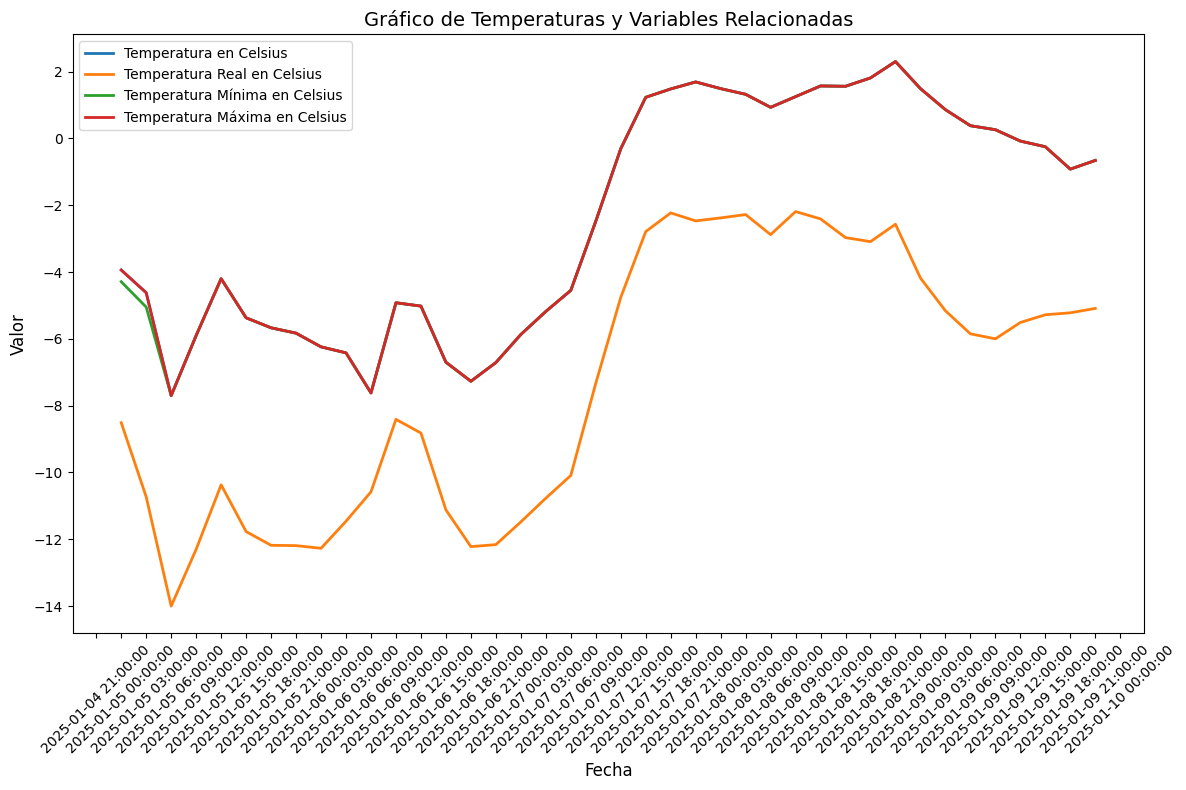

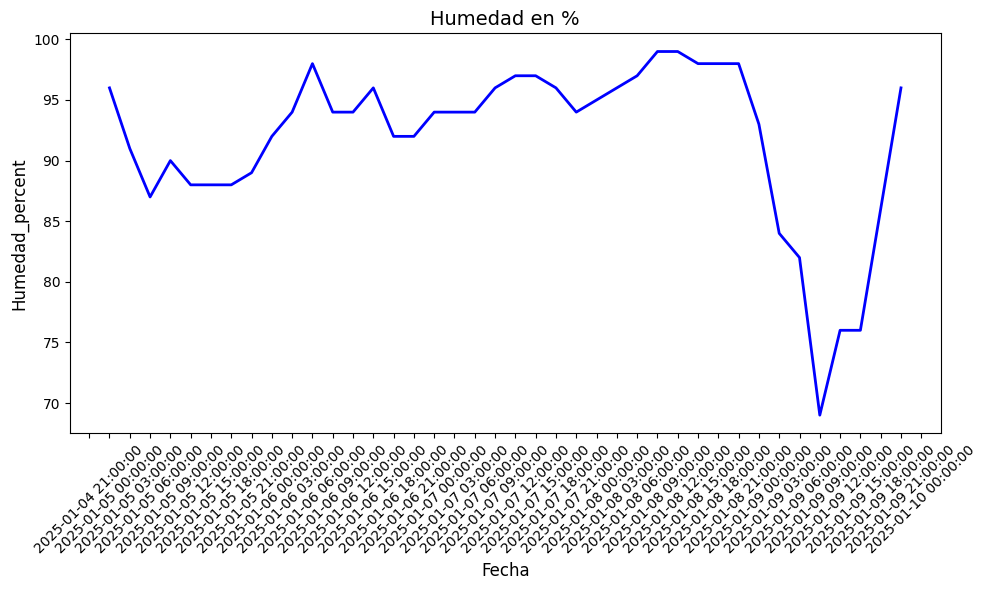

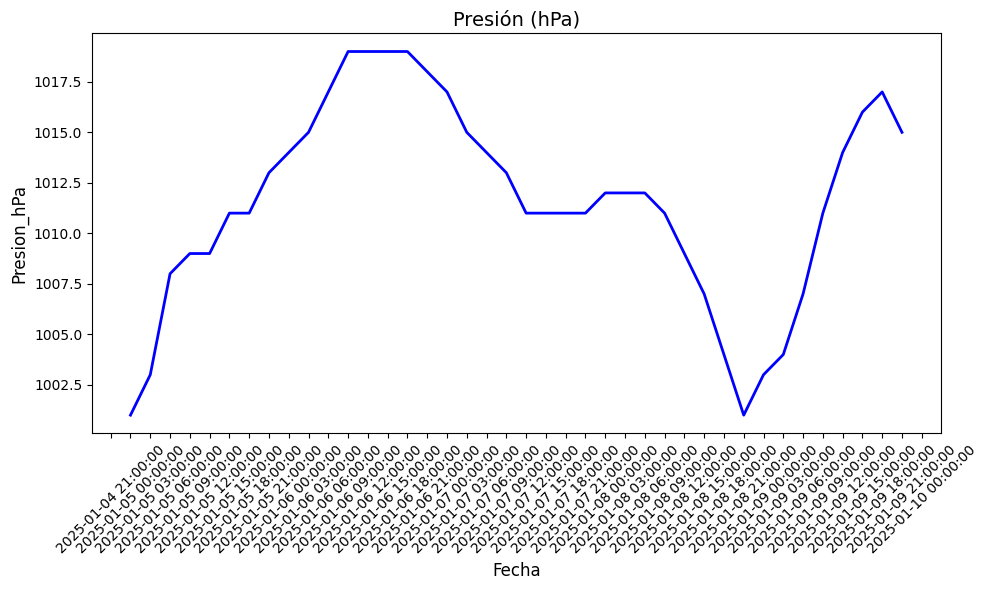

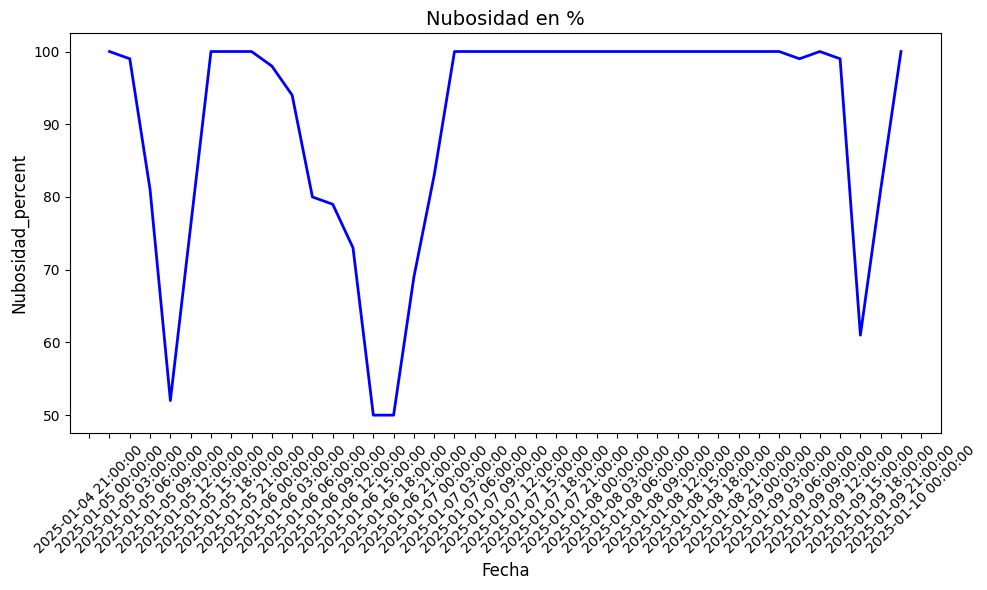

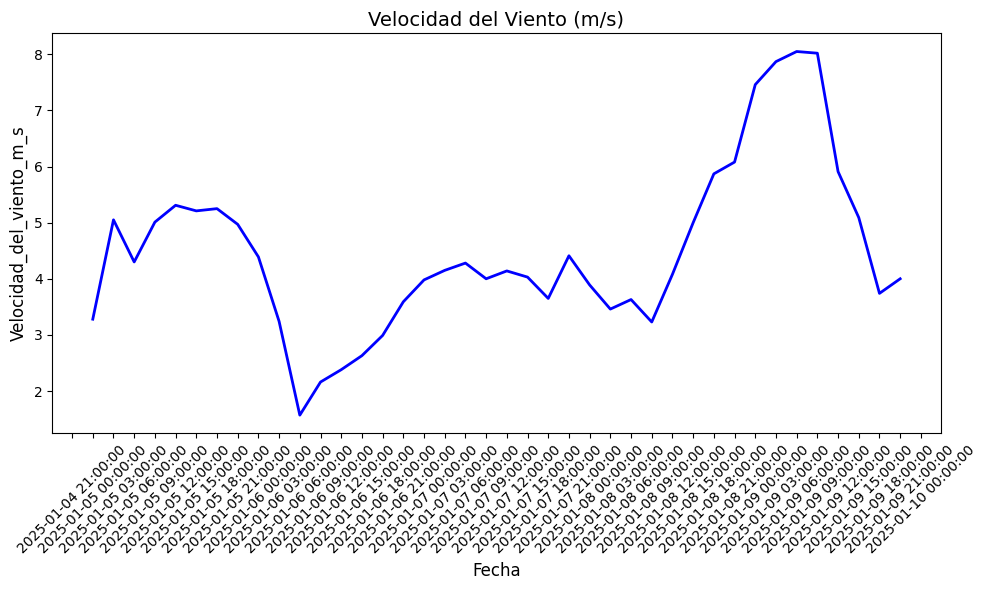

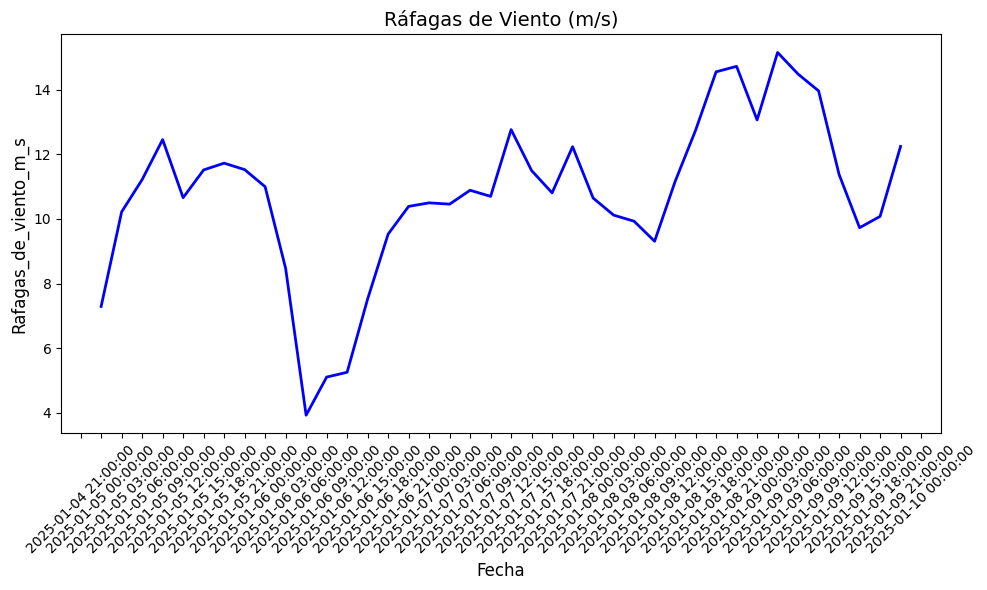

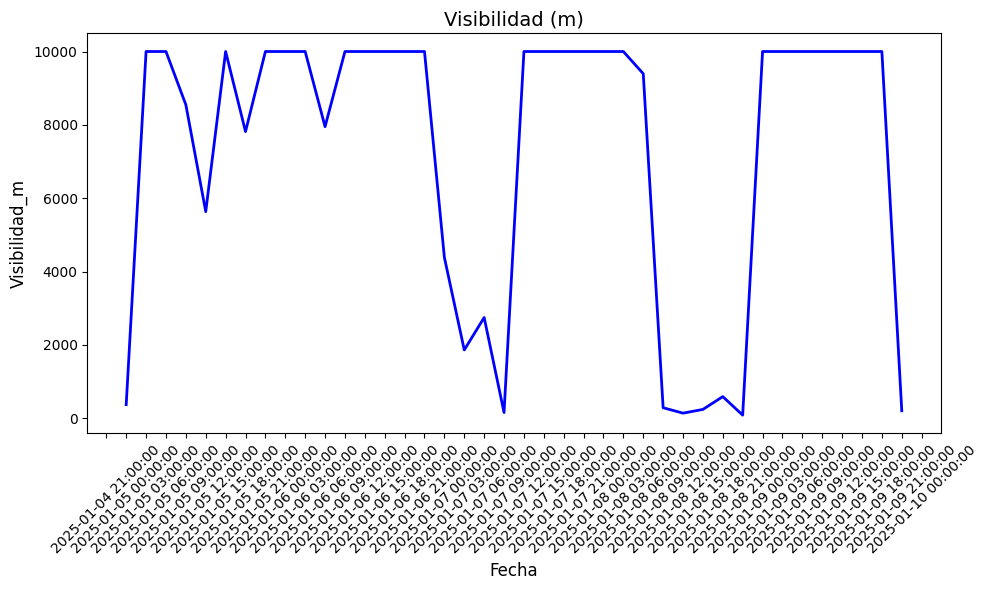

In [18]:
# Verificar si el directorio 'Visualizaciones' existe, si no, crearlo
if not os.path.exists(images_path):
    os.makedirs(images_path)

# Asegúrate de tener tu DataFrame 'df' correctamente cargado y 'Fecha_de_prediccion' esté en formato datetime64
# df = pd.read_csv("path_to_your_data.csv")  # Si necesitas cargar el dataframe

# Función para graficar una columna con 'Fecha_de_prediccion'
def graficar_columna(df, columna, titulo, nombre_archivo):
    # Crear una nueva figura
    plt.figure(figsize=(10, 6))
    
    # Graficar los datos
    plt.plot(df[('Fecha', 'Fecha_de_prediccion')], df[columna], label=titulo, color='b', linewidth=2)
    
    # Mejorar la visualización del gráfico
    plt.title(titulo, fontsize=14)
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel(columna[1], fontsize=12)  # Se usa el nombre de la columna secundaria del MultiIndex
    plt.xticks(rotation=45)
    
    # Configuración de fecha en el eje X
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
    
    # Ajustar el espaciado para que las etiquetas no se sobrepongan
    plt.tight_layout()

    # Guardar la gráfica en archivo
    plt.savefig(os.path.join(images_path, nombre_archivo + '.png'))

    # Mostrar la gráfica
    plt.show()

# Función para graficar múltiples columnas en un solo gráfico
def graficar_varias_columnas(df, columnas, titulos, nombre_archivo):
    # Crear una nueva figura
    plt.figure(figsize=(12, 8))

    # Graficar todas las columnas en el mismo gráfico
    for columna, titulo in zip(columnas, titulos):
        plt.plot(df[('Fecha', 'Fecha_de_prediccion')], df[columna], label=titulo, linewidth=2)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))


    # Mejorar la visualización del gráfico
    plt.title('Gráfico de Temperaturas y Variables Relacionadas', fontsize=14)
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Valor', fontsize=12)
    plt.xticks(rotation=45)

    # Configuración de fecha en el eje X
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))

    # Agregar leyenda para diferenciar las líneas
    plt.legend()

    # Ajustar el espaciado para que las etiquetas no se sobrepongan
    plt.tight_layout()

    # Guardar la gráfica en archivo
    plt.savefig(os.path.join(images_path, nombre_archivo + '.png'))

    # Mostrar la gráfica
    plt.show()

# Definir las columnas y los títulos de las variables que se desean graficar
columnas = [
    ('main', 'Temperatura_celcius'),
    ('main', 'Temperatura_Real_celcius'),
    ('main', 'Temperatura_Minima_celcius'),
    ('main', 'Temperatura_Maxima_celcius'),
]

titulos = [
    'Temperatura en Celsius',
    'Temperatura Real en Celsius',
    'Temperatura Mínima en Celsius',
    'Temperatura Máxima en Celsius',
]

# Graficar todas las columnas juntas en un solo gráfico
graficar_varias_columnas(df, columnas, titulos, 'grafico_temperaturas')

#  Gráfico de Humedad (%) 
graficar_columna(df, ('main', 'Humedad_percent'), 'Humedad en %', 'humedad_percent')

#  Gráfico de Presión (hPa)
graficar_columna(df, ('main', 'Presion_hPa'), 'Presión (hPa)', 'presion_hpa')

#  Gráfico de Nubosidad (%)
graficar_columna(df, ('clouds', 'Nubosidad_percent'), 'Nubosidad en %', 'nubosidad_percent')

#  Gráfico de Velocidad del Viento (m/s)
graficar_columna(df, ('wind', 'Velocidad_del_viento_m_s'), 'Velocidad del Viento (m/s)', 'velocidad_viento_m_s')

#  Gráfico de Rafagas del Viento (m/s)
graficar_columna(df, ('wind', 'Rafagas_de_viento_m_s'), 'Ráfagas de Viento (m/s)', 'rafagas_viento_m_s')

#  Gráfico de Visibilidad (m)
graficar_columna(df, ('visibility', 'Visibilidad_m'), 'Visibilidad (m)', 'visibilidad_m')